1# Assignment 3: Linear Regression and Gradient Descent from the Ground Up

The goal of this assignment is to work through the fundamentals of Simple Linear Regression (one independent variable) with Mean Squared Error (average L2 loss) using Gradient Descent.

## Submission Instructions

- Please submit your notebook as a **Jupyter Notebook** on Canvas.
- **Due Date: Wednesday, October 22 at 6:59pm**. 
- **No late submissions** will be accepted for this assignment.

 ## Collaboration:



You are allowed to work with others on this assignment.

Please list the names of those you work with below.

Collaborators: 

## Part 0 - Imports and CoW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
#Set Copy-on-Write
pd.options.mode.copy_on_write = True

## Part 1 : Linear Regression
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$ 


### 1.a. 
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and we receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

y = 9

### 1.b.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

l2_loss = 9 - 6.1 = 2.9

## Part 2 : Gradient Descent with One Parameter

The following function generates the dataset you need for the rest of the questions

In [3]:
# This function helps generate a synthetic dataset based on a given slope value
def generate_dataset(slope, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std 
    intercept = -int(with_intercept) * 2
    Y = slope * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [4]:
# Example:
data = generate_dataset(slope=10)
data

,X,Y
0,0.981997,7.312173
1,0.061754,0.459787
2,0.576274,3.748995
3,0.901987,6.902705
4,0.463515,1.188907
...,...,...
95,0.091666,-1.703185
96,0.803868,5.817812
97,0.125400,0.076406
98,0.502113,5.038664


### 2.a.

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of slope that the gradient descent algorithm can find in 100 iterations for initial slope=0.1 and $\alpha=0.01$. 

In [21]:
def gradient_descent(df, initial_guess, alpha, n, data):
    #len of guess = 1
    guesses = [initial_guess]
    guess = initial_guess
    epoch_loss = {}
    i = 1

    while len(guesses) < n:
        #loss
        loss = mse_loss(guess, data)
        epoch_loss[i] = loss
        # weight update
        guess = guess - alpha * df(guess,data)
        guesses.append(guess)
        i+=1

    return np.array(guesses), epoch_loss

def mse_loss(slope, data):
    ''' Mean Squared Error Loss Function '''
    x = data['X']
    y_obs = data['Y']
    y_hat = slope * x
    return np.mean((y_hat - y_obs) ** 2)  

def mse_loss_derivative(slope, data):
    x = data['X']
    y_obs = data['Y']
    y_hat = slope * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [48]:
slope = .1
a = .01
epochs = 100


weights, losses = gradient_descent(df=mse_loss_derivative, initial_guess=slope, alpha=a, n=epochs, data=data)


best_slope1 = weights[-1]


print(f"Best Slope: {best_slope1}")
print(f"Final Loss: {losses[99]}")




Best Slope: 3.6654728037430364
Final Loss: 6.769611881463041


### 2.b.

Now change the learning rate to be $\alpha=0.1$ and repeat 2.a


In [49]:
slope = .1
a = .1
epochs = 100

weights, losses = gradient_descent(df=mse_loss_derivative, initial_guess=slope, alpha=a, n=epochs, data=data)

best_slope2 = weights[-1]
print(f"Best Slope: {best_slope2}")
print(f"Final Loss: {losses[99]}")


Best Slope: 7.322207484549413
Final Loss: 2.115255867208168


### 2.c.

Create two plots showing the simple linear regression models you fitted on the observed data when you pick the slope using the gradient descent algorithm above. One plot for data with and one plot for data without an intercept. Each plot should include at least the following:
- A scatter plot of all the observed data
- Regression lines for the simple linear regression models 
- An appropriate title, a legend showing which line is which, and labels for both axes

Clarification: Take the data generated (with_intercept=True) for 2A and 2B and plot the two lines that you fitted from 2A and 2B, plotted with a scatterplot of the data. Thats one plot. Then generate a new dataset without an intercept (set with_intercept=False when you call generate_dataset) and do the same plot again; two lines, one for each learning rate. The lines you are fitting are still models with no "bias term" (no theta-zero).


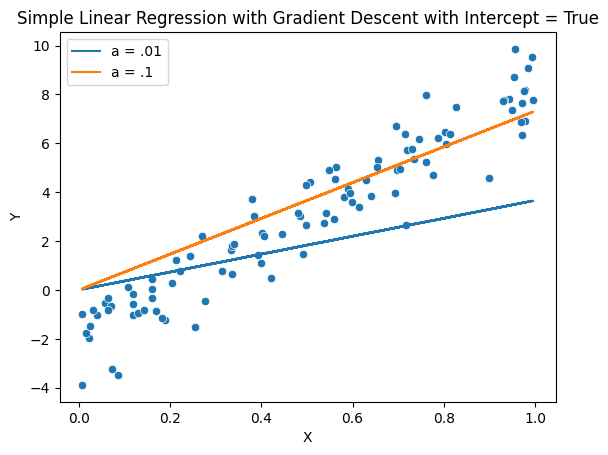

In [50]:
sns.scatterplot(data=data, x='X', y='Y')
plt.plot(data['X'], best_slope1 * data['X'], label='a = .01')
plt.plot(data['X'], best_slope2 * data['X'], label='a = .1')
plt.plot()
plt.legend()
plt.title('Simple Linear Regression with Gradient Descent with Intercept = True')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [51]:
data2 = generate_dataset(slope=10, with_intercept=False)


We need to go back and retrain the model with this new data now that it has data with no intercept

In [52]:
slope = .1
a = .1
epochs = 100


weights, losses = gradient_descent(df=mse_loss_derivative, initial_guess=slope, alpha=a, n=epochs, data=data2)


best_slope3 = weights[-1]


print(f"Best Slope: {best_slope3}")
print(f"Final Loss: {losses[99]}")



Best Slope: 9.764667474911759
Final Loss: 1.1181350086086022


In [56]:
slope = .1
a = .01
epochs = 100


weights, losses = gradient_descent(df=mse_loss_derivative, initial_guess=slope, alpha=a, n=epochs, data=data2)


best_slope4 = weights[-1]


print(f"Best Slope: {best_slope4}")
print(f"Final Loss: {losses[99]}")

Best Slope: 5.4545185912925715
Final Loss: 8.79297078588275


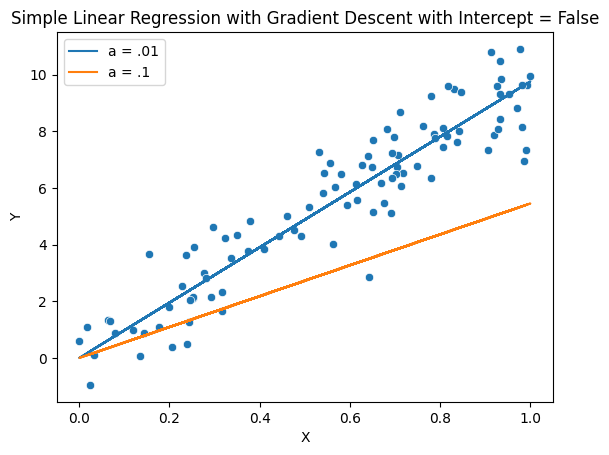

In [57]:
sns.scatterplot(data=data2, x='X', y='Y')
plt.plot(data2['X'], best_slope3 * data2['X'], label='a = .01')
plt.plot(data2['X'], best_slope4 * data2['X'], label='a = .1')
plt.plot()
plt.legend()
plt.title('Simple Linear Regression with Gradient Descent with Intercept = False')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2.d.
Which value of $\alpha$ resulted in a better model? Why?

The value that resulted in the best a value was the .1 value; the reason is why because it was a larger step size meaning that the model was updating at a faster
rate, then the .01 value. However if given more training epochs the .01 maybe able to better fit and result in lower loss then the .1 value.

## Part 3 : Gradient Descent with 1-2 parameters

### 3.a. 
Problem 2 did not include an intercept term (or "bias" term). Write a function calculate_y_hat(X, Y, with_intercept) that computes the value of y_hat for your model using either one or two parameters (slope and intercept or just slope) based on whether or not an intercept term is specified within the model. The argument with_intercept should be a boolean.

Hint: Use sklearn.linear_model.LinearRegression library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:

def calculate_y_hat(X, Y, theta, theta_0,with_intercept):
    """
        Calculuates y hat with or without the intercept.
        Parameters
        ----------
        X: feature data
        Y: target data

        Returns
        -------
        weights needed for final model

    """
    x = data['X']
    if with_intercept:
        y_hat = theta * x + theta_0
    else:
        y_hat = theta * x
    return y_hat



In [21]:
## training for y hat no theta_0
epochs = 100
theta = 0
theta_0 = 0
alpha = .1

thetas = [theta]
epochs_loss = {}

for i in range(epochs):
    y_hat = calculate_y_hat(data["X"], data["Y"], theta, theta_0, with_intercept=False)

    loss  = np.mean((y_hat - data["Y"]) ** 2)
    epochs_loss[i] = loss
    #theta update
    theta = theta - alpha * np.mean(2 * (y_hat - data["Y"]) * data["X"])
    thetas.append(theta)

    #no theta_0 update here
best_theta1 = thetas[-1]
print("Best theta, ", best_theta1)
print("Final loss: ", epochs_loss[99])




Best theta,  7.322000251425763
Final loss:  1.8354046677584634


In [22]:
epochs = 100
theta = 0
theta_0 = 0
alpha = .1

thetas = [(theta, theta_0)]
epochs_loss = {}

for i in range(epochs):
    y_hat = calculate_y_hat(data["X"], data["Y"], theta, theta_0, with_intercept=True)

    loss  = np.mean((y_hat - data["Y"]) ** 2)
    epochs_loss[i] = loss
    #theta update
    theta = theta - alpha * np.mean(2 * (y_hat - data["Y"]) * data["X"])
    theta_0 = theta_0 - alpha * np.mean(2 * (y_hat - data["Y"]))

    thetas.append((theta, theta_0))

    #no theta_0 update here
best_theta2 = thetas[-1]
print("Best theta, ", best_theta2)
print("Final loss: ", epochs_loss[99])


Best theta,  (7.785449534465292, -0.5927310418603001)
Final loss:  1.4755203062314226


)### 3.b.

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

You should use different colors for the two line plots

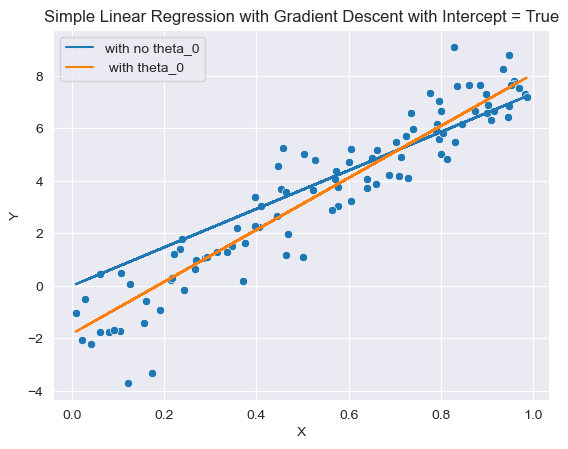

In [20]:
theta, theta_0 = best_theta2

sns.scatterplot(data=data, x='X', y='Y')
plt.plot(data['X'], best_theta1 * data['X'], label='with no theta_0')
plt.plot(data['X'], theta * data['X'] + theta_0, label=' with theta_0')
plt.legend()
plt.title('Simple Linear Regression with Gradient Descent with Intercept = True')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()